### Problem and Data Explanation

- Supervised: 훈련데이터 with label

- Multi-class classification: Labels with 4 discrete values class

<br>

#### Objective

- household level 예측

- 1: extrme poverty

- 2: moderate poverty

- 3: vulnerable households

- 4: non vulnerable households


<br>

#### Metric: Macro F1 score

*standard

F1 = 2* (precision*recall) /(precision + recall)

*Multi-class

Macro F1 = (F1 Class 1 + F1 Class2 + F1 Class 3 + F1 Class 4) /4

"""
from sklearn.metrics import f1_score
f1_score(y_true, y_predicted, average = 'macro`)
"""

---


### Road Data and Look at Summary Information

In [ ]:
#imports

##Data manipulation

import pandas as pd
import numpy as np

#Visualization

import matplotlib.pyplot as plt
import seaborn as sns

#Set a few plotting defaults
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
plt.rcParams['patch.edgecolor'] = 'k'

In [ ]:
pd.options.display.max_columns = 159

#read in data
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [ ]:
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15488 entries, 0 to 15487
Columns: 142 entries, Id to agesq
dtypes: float64(77), int64(60), object(5)
memory usage: 16.8+ MB


Text(0.5, 1.0, 'Count of Unique Values in Integer Columns')

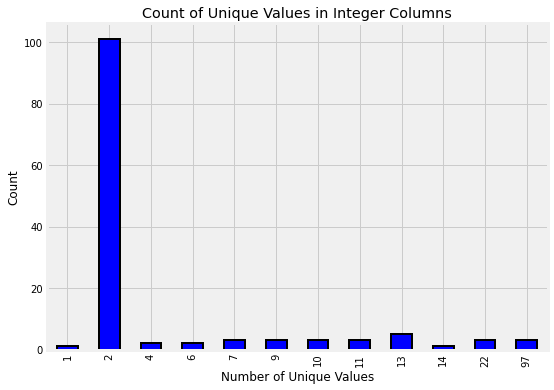

In [ ]:
#integer columns

train.select_dtypes(np.int64).nunique().value_counts().sort_index().plot.bar(color='blue',
                                                                             figsize = (8,6),
                                                                             edgecolor='k', linewidth=2)
plt.xlabel('Number of Unique Values');
plt.ylabel('Count');
plt.title('Count of Unique Values in Integer Columns')

'\nrepresenting the average education of the adults in the household \nappears to be related to the poverty level: \na higher average adult education leads to higher values of the target \nwhich are less severe levels of poverty\n'

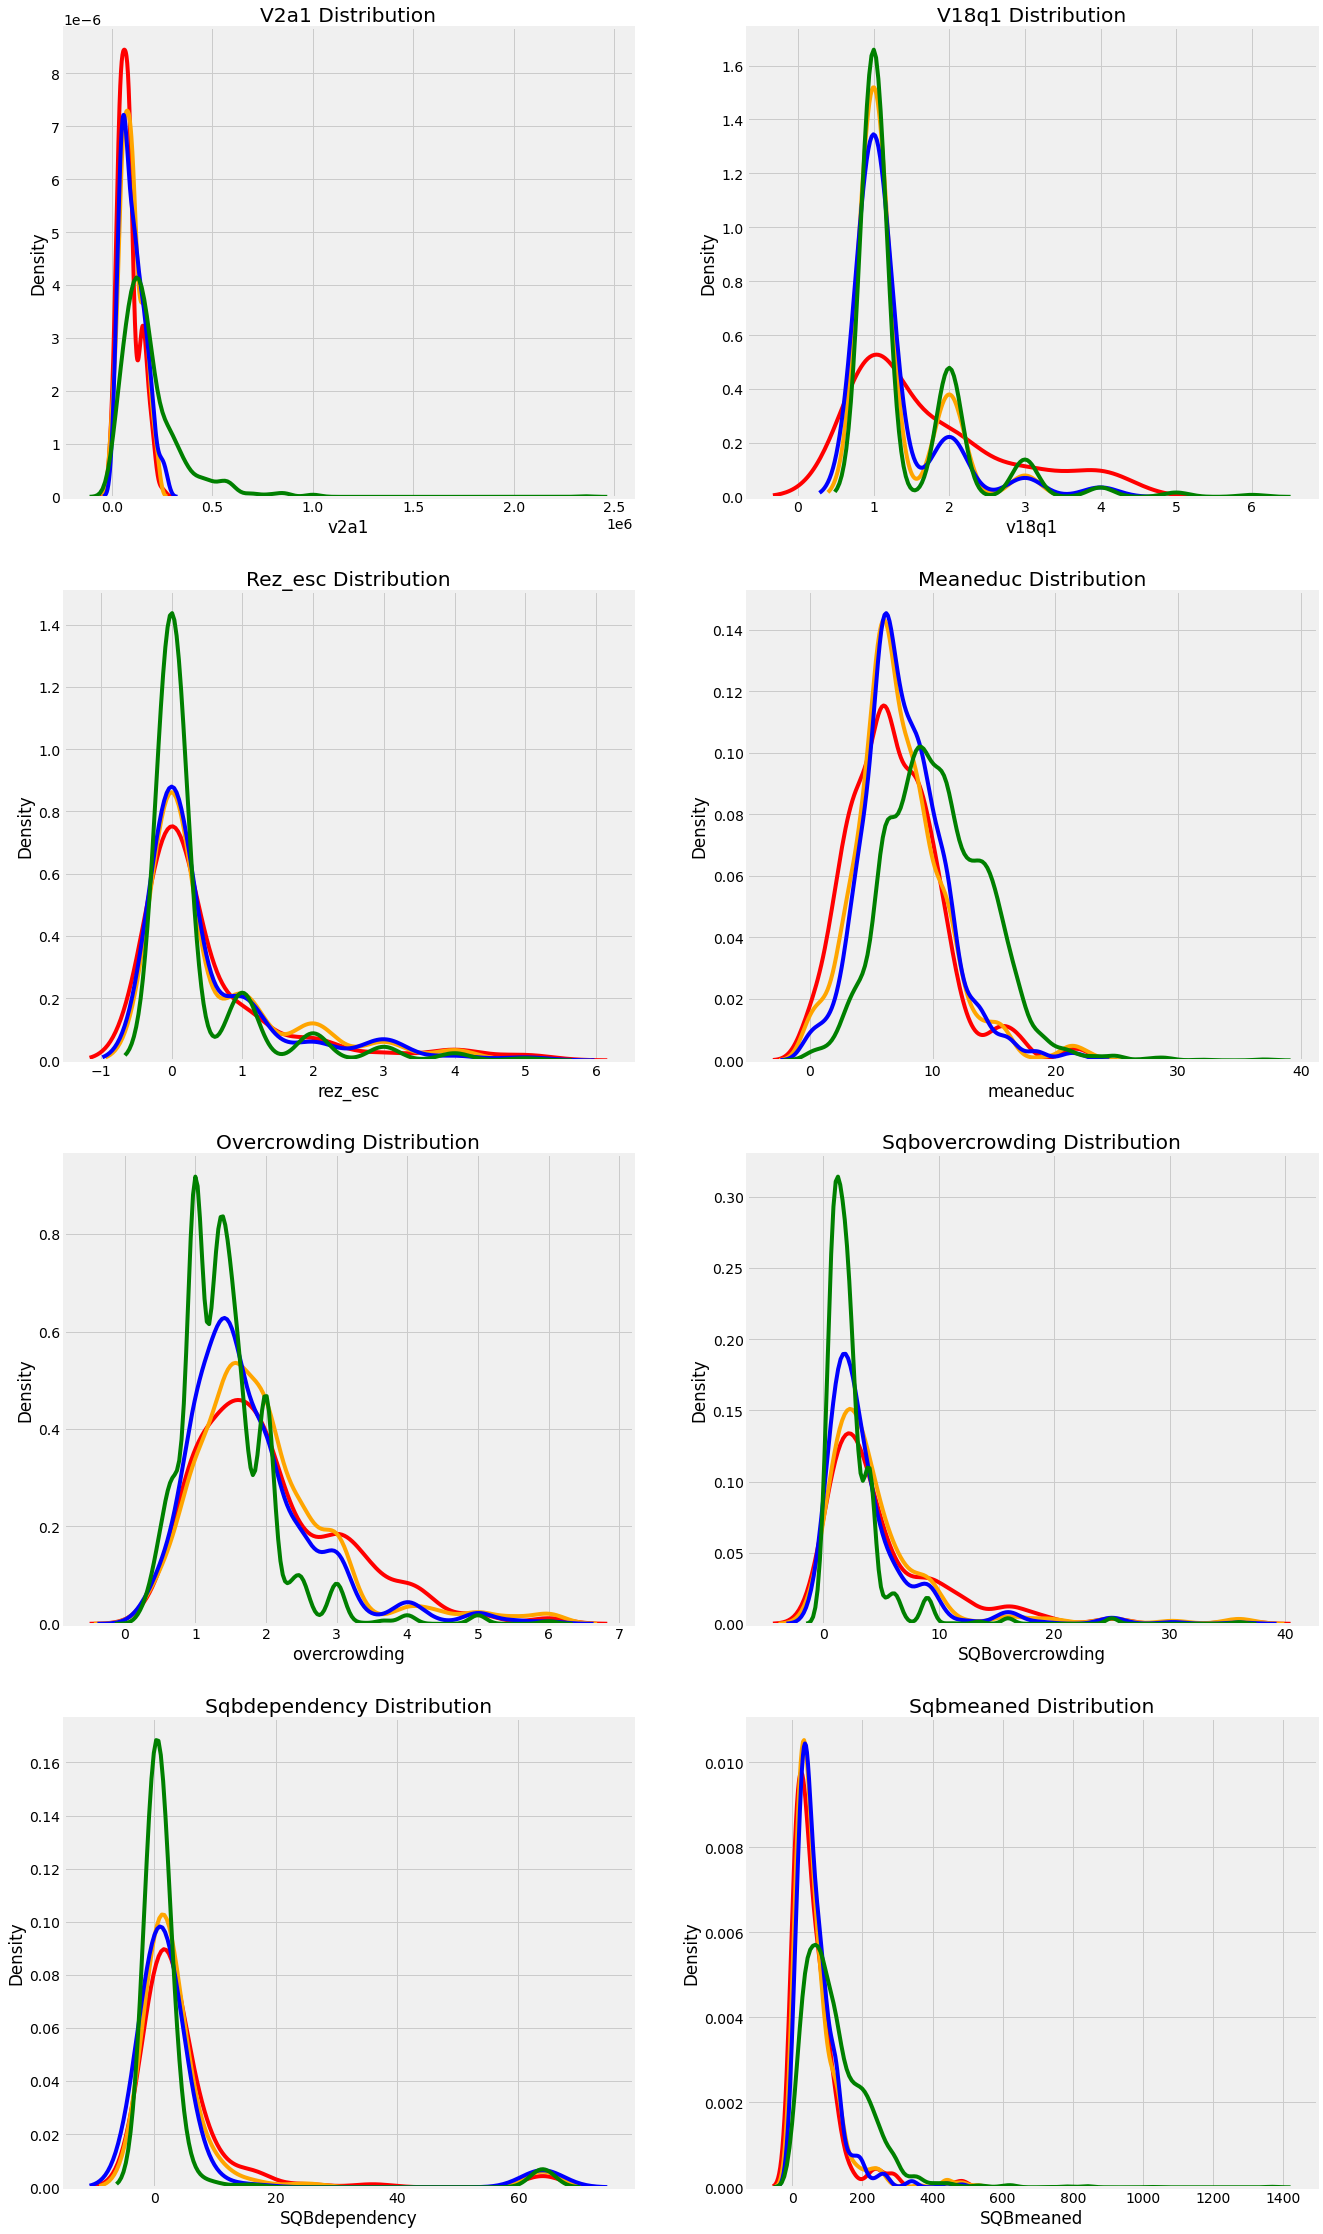

In [ ]:
#Float columns는 연속형 변수이기에 OrderDict를 mapping하여 색깔을 숫자로 변경
#키값이 같은 order을 갖는다.: Python dictionary랑 다름

from collections import OrderedDict

plt.figure(figsize = (20,16))
plt.style.use('fivethirtyeight')

#Color mapping
colors = OrderedDict({1:'red', 2:'orange', 3:'blue', 4:'green'})
poverty_mapping = OrderedDict({1:'extreme', 2:'moderate', 3:'vulnerable', 4:'non vulnerable'})

#iterate through the float columns

for i, col in enumerate(train.select_dtypes('float')):
    ax = plt.subplot(4,2, i+1)
    #Iterate through the poverty leves
    for poverty_level, color in colors.items():
        #Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target']== poverty_level,col].dropna(),
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
    plt.title(f'{col.capitalize()} Distribution');
    plt.xlabel(f'{col}');
    plt.ylabel('Density')
plt.subplots_adjust(top=2)

"""
representing the average education of the adults in the household 
appears to be related to the poverty level: 
a higher average adult education leads to higher values of the target 
which are less severe levels of poverty
"""

In [ ]:
#Object Columns
train.select_dtypes('object').head()

,Id,idhogar,dependency,edjefe,edjefa
0,ID_279628684,21eb7fcc1,no,10,no
1,ID_f29eb3ddd,0e5d7a658,8,12,no
2,ID_68de51c94,2c7317ea8,8,no,11
3,ID_d671db89c,2b58d945f,yes,11,no
4,ID_d56d6f5f5,2b58d945f,yes,11,no


In [ ]:
#머신러닝을 위해서 고유값인 id 와 idhogar말고는 숫치화
#yes:1, no:0

mapping = {"yes":1, "no":0}

#Apply same operation to both train and test

for df in [train, test]:
    #Fill in the values with the correct mapping
    df['dependency'] = df['dependency'].replace(mapping).astype(np.float64)
    df['edjefa'] = df['edjefa'].replace(mapping).astype(np.float64)
    df['edjefe'] = df['edjefe'].replace(mapping).astype(np.float64)

train[['dependency', 'edjefa', 'edjefe']].describe()

,dependency,edjefa,edjefe
count,9557.000000,9557.000000,9557.000000
mean,1.149550,2.896830,5.096788
std,1.605993,4.612056,5.246513
min,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.000000
50%,0.666667,0.000000,6.000000
75%,1.333333,6.000000,9.000000
max,8.000000,21.000000,21.000000


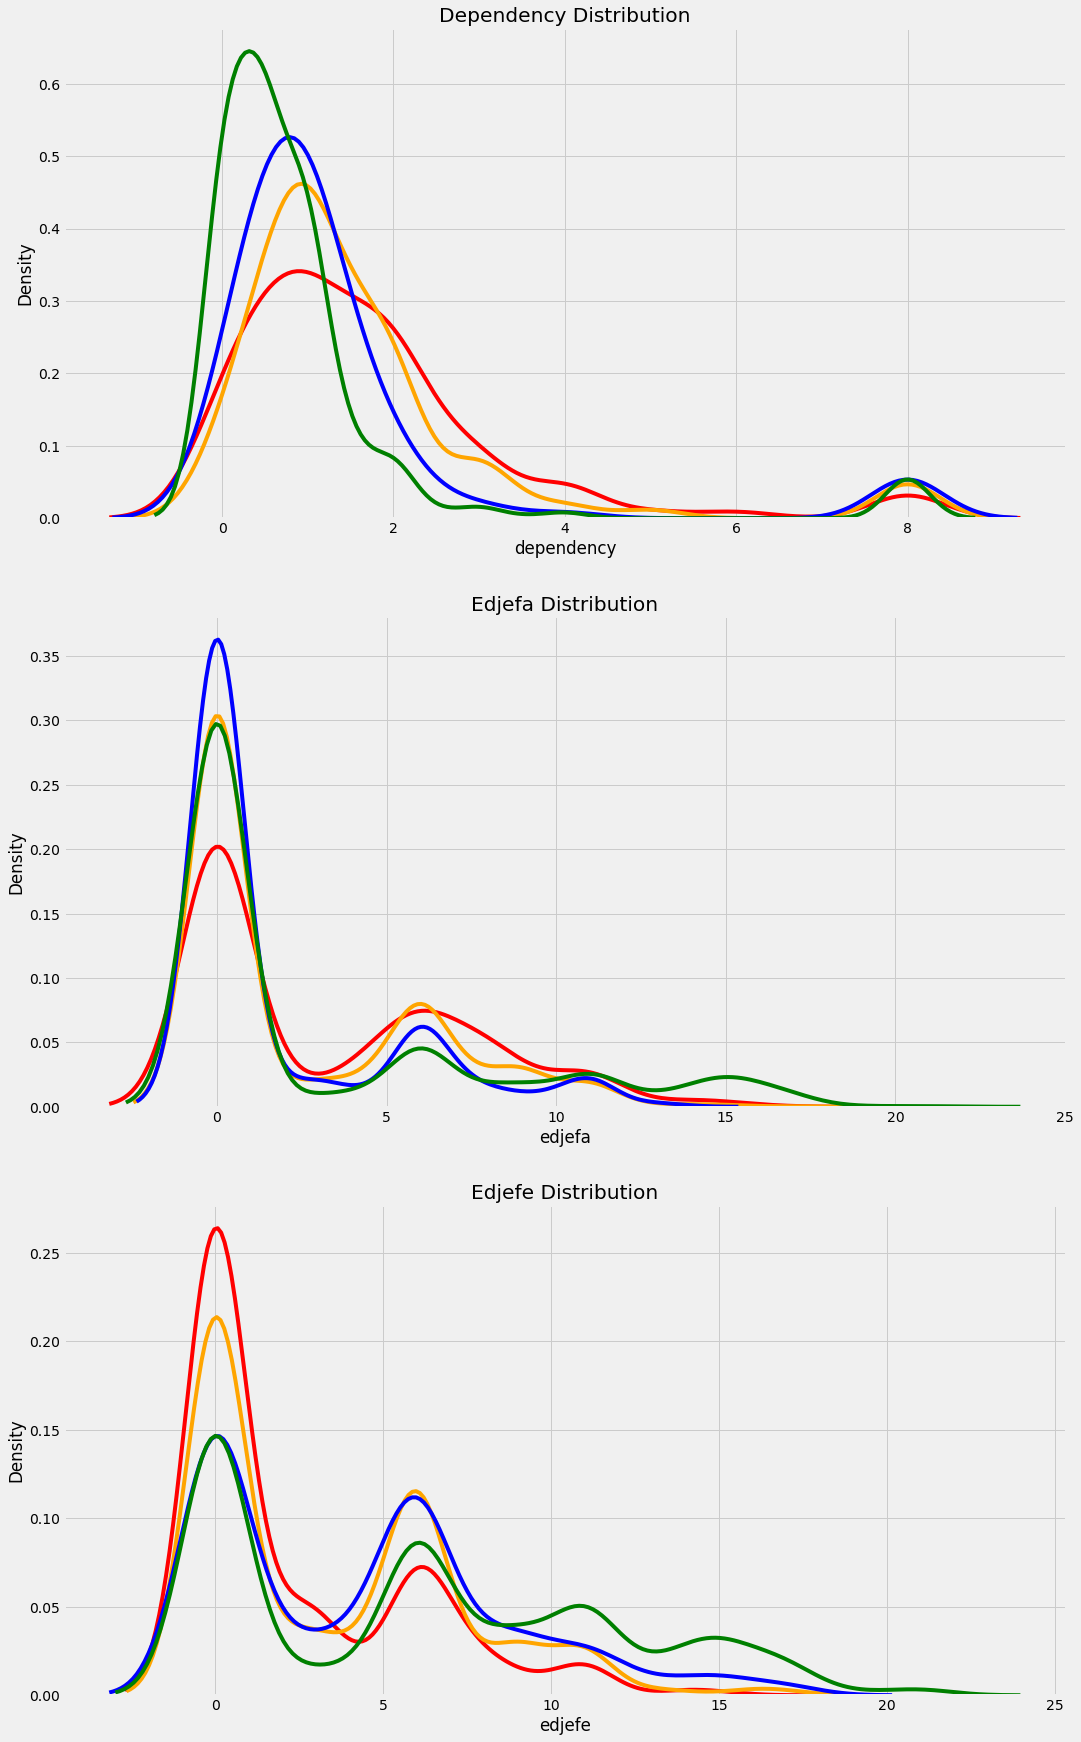

In [ ]:
plt.figure(figsize = (16, 12))

# Iterate through the float columns
for i, col in enumerate(['dependency', 'edjefa', 'edjefe']):
    ax = plt.subplot(3, 1, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # Plot each poverty level as a separate line
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = poverty_mapping[poverty_level])
        
    plt.title(f'{col.capitalize()} Distribution'); plt.xlabel(f'{col}'); plt.ylabel('Density')

plt.subplots_adjust(top = 2)

In [ ]:
#Add null Target column to test
test['Target'] = np.nan
data = train.append(test, ignore_index = True)

#### Exploring Label Distribution

1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64

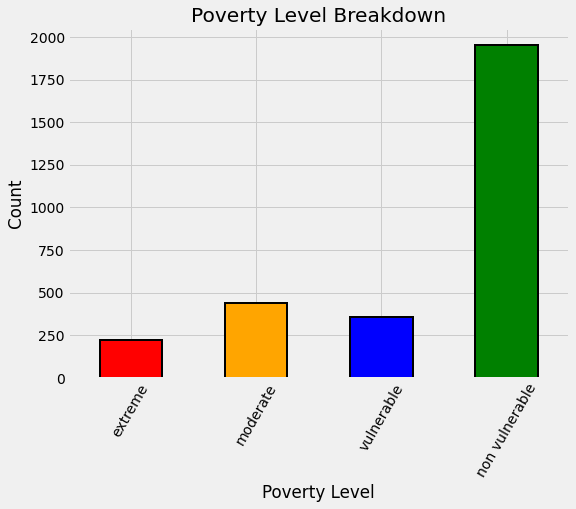

In [ ]:
#heads of household
heads = data.loc[data['parentesco1']==1].copy()

#Labels for training

train_labels = data.loc[(data['Target'].notnull())&(data['parentesco1'] ==1), ['Target', 'idhogar']]

#value counts of target
label_counts = train_labels['Target'].value_counts().sort_index()

#Bar plot occurrences of each label
label_counts.plot.bar(figsize=(8,6),
                      color = colors.values(),
                      edgecolor = 'k', linewidth =2 )

#Formatting
plt.xlabel('Poverty Level');
plt.ylabel('Count');
plt.xticks([x-1 for x in poverty_mapping.keys()],
           list(poverty_mapping.values()), rotation = 60)
plt.title('Poverty Level Breakdown');
label_counts


### Addressing wrong labels



In [ ]:
#Identify Errors
## Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)

# Households where targets are not all equal
not_equal = all_equal[all_equal != True]
print('There are {} households where the family members do not all have the same target.'.format(len(not_equal)))

There are 85 households where the family members do not all have the same target.


In [ ]:
train[train['idhogar'] == not_equal.index[0]][['idhogar', 'parentesco1', 'Target']]

,idhogar,parentesco1,Target
7651,0172ab1d9,0,3
7652,0172ab1d9,0,2
7653,0172ab1d9,0,3
7654,0172ab1d9,1,3
7655,0172ab1d9,0,2


In [ ]:
#families without heads of household

households_leader = train.groupby('idhogar')['parentesco1'].sum()

##Find households without a head
households_no_head = train.loc[train['idhogar'].isin(households_leader[households_leader ==0].index),:]

print('There are {} households without a head.'.format(households_no_head['idhogar'].nunique()))

There are 15 households without a head.


In [ ]:
# Find households without a head and where labels are different
households_no_head_equal = households_no_head.groupby('idhogar')['Target'].apply(lambda x: x.nunique() == 1)
print('{} Households with no head have different labels.'.format(sum(households_no_head_equal == False)))

0 Households with no head have different labels.


In [17]:
#Correct Errors
##Iterate through each household

for household in not_equal.index:
    #Find the correct label(for the head of household)
    true_target = int(train[(train['idhogar'] == household) & (train['parentesco1'] == 1.0)]['Target'])
    #Set the correct label for all members in the household
    train.loc[train['idhogar'] == household, 'Target'] = true_target

#Groupby the household and figure out the number of unique values
all_equal = train.groupby('idhogar')['Target'].apply(lambda x: x.nunique() ==1)

#Households where targets are not all equal
not_equal = all_equal[all_equal != True]

#Households where targets are not all equal
print('The are {} households where the family members do not all have the same target.'.format(len(not_equal)))

The are 0 households where the family members do not all have the same target.


## Missing Variables


In [18]:
#number of missing in each column
missing = pd.DataFrame(data.isnull().sum()).rename(columns = {0: 'total'})

#Create a percentage missing
missing['percent'] = missing['total'] / len(data)
missing.sort_values('percent', ascending = False).head(10).drop('Target')

,total,percent
rez_esc,20960,0.836894
v18q1,18306,0.730924
v2a1,17604,0.702895
SQBmeaned,16,0.000639
meaneduc,16,0.000639
hogar_adul,1,0.000040
parentesco10,1,0.000040
parentesco11,1,0.000040
parentesco12,1,0.000040


In [19]:
def plot_value_counts(df, col, heads_only = False):
    """
    Plot value counts of a column, optionally with only the heads of household

    """
    #Select heads of household
    if heads_only:
        df = df.loc[df['parentesco'] == 1].copy()

    plt.figure(figsize=(8,6))
    df[col].value_counts().sort_index().plot.bar(color = 'blue',
                                                 edgecolor='k',
                                                 linewidth=2)
    plt.xlabel(f'{col}');
    plt.title(f'{col} Value Counts');
    plt.ylabel('Count')
    plt.show();

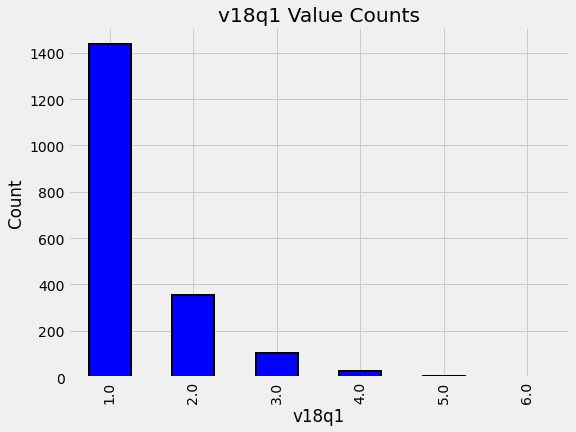

In [20]:
plot_value_counts(heads, 'v18q1')

In [21]:
heads.groupby('v18q')['v18q1'].apply(lambda x:x.isnull().sum())

v18q
0    5786
1       0
Name: v18q1, dtype: int64

In [22]:
data['v18q1'] = data['v18q1'].fillna(0)

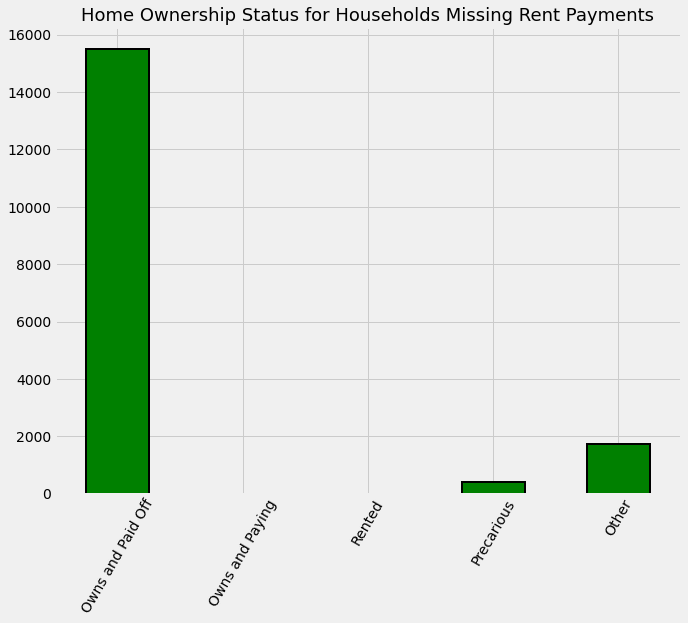

In [26]:

# Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

In [27]:
data.loc[(data['tipovivi1'] ==1), 'v2a1'] = 0
#Create missing rent payment column
data['v2a1-missing'] = data['v2a1'].isnull()

data['v2a1-missing'].value_counts()

False    22937
True      2108
Name: v2a1-missing, dtype: int64

In [28]:
data.loc[data['rez_esc'].notnull()]['age'].describe()

count    4085.000000
mean       12.236720
std         3.199615
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64

In [29]:
data.loc[data['rez_esc'].isnull()]['age'].describe()

count    20959.000000
mean        39.712057
std         20.924703
min          0.000000
25%         25.000000
50%         39.000000
75%         55.000000
max         97.000000
Name: age, dtype: float64

In [31]:
# If individual is over 19 or younger than 7 and missing years behind, set it to 0
data.loc[((data['age'] > 19) | (data['age'] < 7)) & (data['rez_esc'].isnull()), 'rez_esc'] = 0

# Add a flag for those between 7 and 19 with a missing value
data['rez_esc-missing'] = data['rez_esc'].isnull()

In [32]:
data.loc[data['rez_esc'] > 5, 'rez_esc'] = 5

### Plot Two Categorical Variables

In [33]:
def plot_categoricals(x, y, data, annotate = True):
    """Plot counts of two categoricals.
    Size is raw count for each grouping.
    Percentages are for a given value of y."""
    
    # Raw counts 
    raw_counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = False))
    raw_counts = raw_counts.rename(columns = {x: 'raw_count'})
    
    # Calculate counts for each group of x and y
    counts = pd.DataFrame(data.groupby(y)[x].value_counts(normalize = True))
    
    # Rename the column and reset the index
    counts = counts.rename(columns = {x: 'normalized_count'}).reset_index()
    counts['percent'] = 100 * counts['normalized_count']
    
    # Add the raw count
    counts['raw_count'] = list(raw_counts['raw_count'])
    
    plt.figure(figsize = (14, 10))
    # Scatter plot sized by percent
    plt.scatter(counts[x], counts[y], edgecolor = 'k', color = 'lightgreen',
                s = 100 * np.sqrt(counts['raw_count']), marker = 'o',
                alpha = 0.6, linewidth = 1.5)
    
    if annotate:
        # Annotate the plot with text
        for i, row in counts.iterrows():
            # Put text with appropriate offsets
            plt.annotate(xy = (row[x] - (1 / counts[x].nunique()), 
                               row[y] - (0.15 / counts[y].nunique())),
                         color = 'navy',
                         s = f"{round(row['percent'], 1)}%")
        
    # Set tick marks
    plt.yticks(counts[y].unique())
    plt.xticks(counts[x].unique())
    
    # Transform min and max to evenly space in square root domain
    sqr_min = int(np.sqrt(raw_counts['raw_count'].min()))
    sqr_max = int(np.sqrt(raw_counts['raw_count'].max()))
    
    # 5 sizes for legend
    msizes = list(range(sqr_min, sqr_max,
                        int(( sqr_max - sqr_min) / 5)))
    markers = []
    
    # Markers for legend
    for size in msizes:
        markers.append(plt.scatter([], [], s = 100 * size, 
                                   label = f'{int(round(np.square(size) / 100) * 100)}', 
                                   color = 'lightgreen',
                                   alpha = 0.6, edgecolor = 'k', linewidth = 1.5))
        
    # Legend and formatting
    plt.legend(handles = markers, title = 'Counts',
               labelspacing = 3, handletextpad = 2,
               fontsize = 16,
               loc = (1.10, 0.19))
    
    plt.annotate(f'* Size represents raw count while % is for a given y value.',
                 xy = (0, 1), xycoords = 'figure points', size = 10)
    
    # Adjust axes limits
    plt.xlim((counts[x].min() - (6 / counts[x].nunique()), 
              counts[x].max() + (6 / counts[x].nunique())))
    plt.ylim((counts[y].min() - (4 / counts[y].nunique()), 
              counts[y].max() + (4 / counts[y].nunique())))
    plt.grid(None)
    plt.xlabel(f"{x}"); plt.ylabel(f"{y}"); plt.title(f"{y} vs {x}");


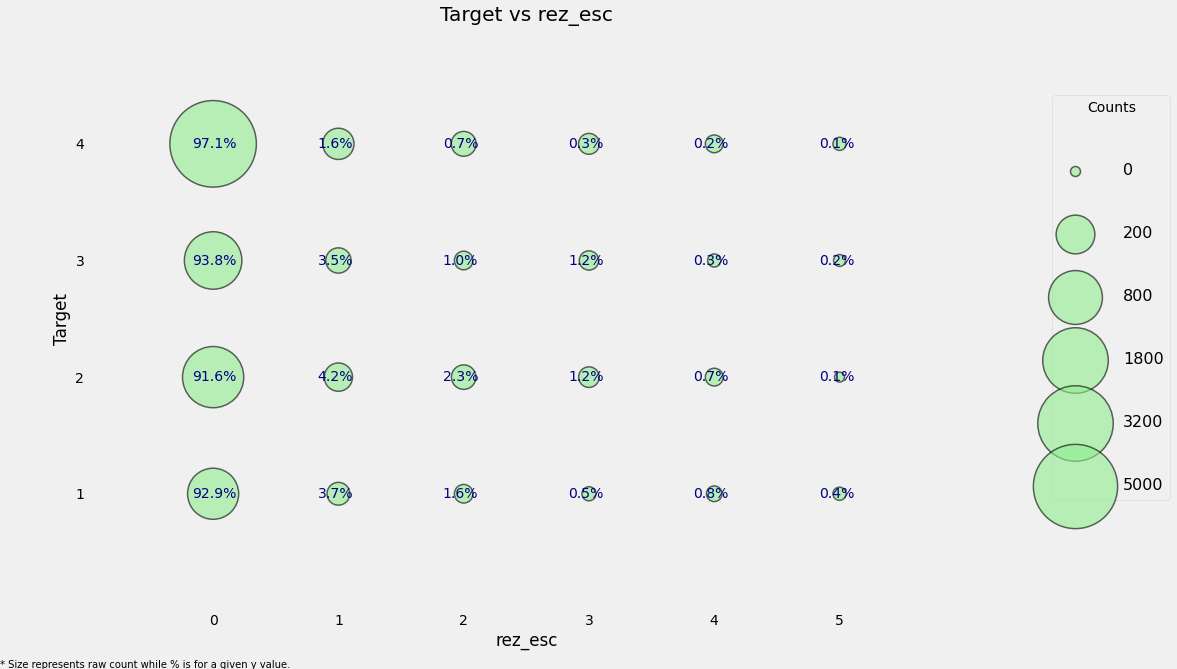

In [34]:
plot_categoricals('rez_esc', 'Target', data);

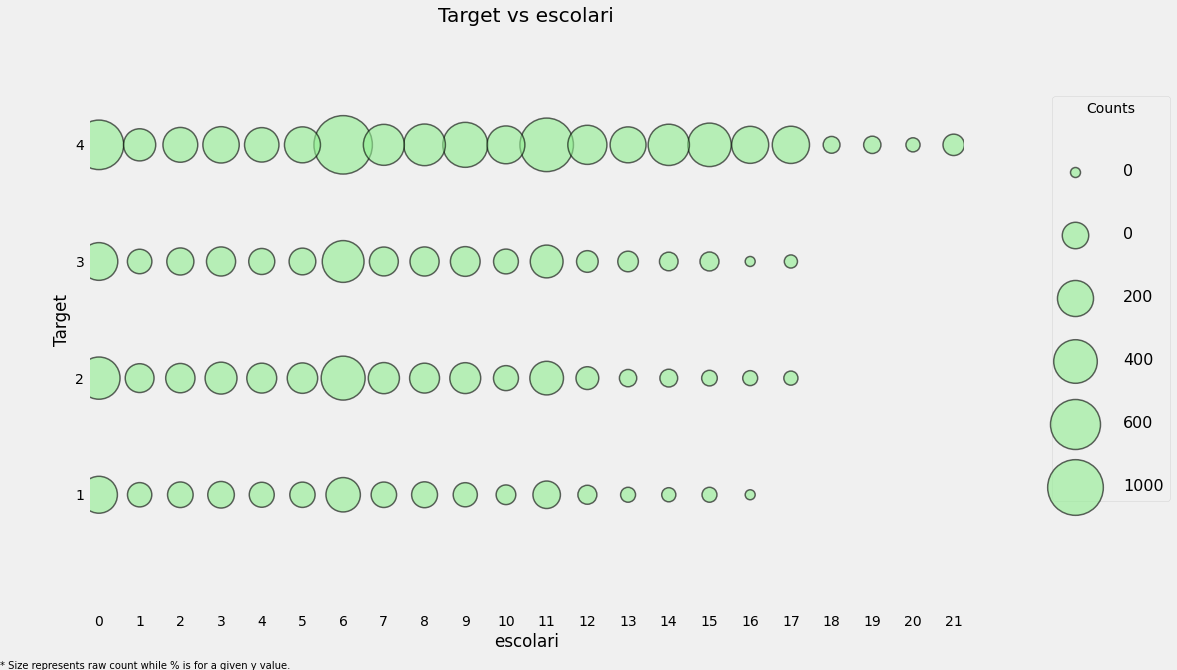

In [35]:
plot_categoricals('escolari', 'Target', data, annotate=False)

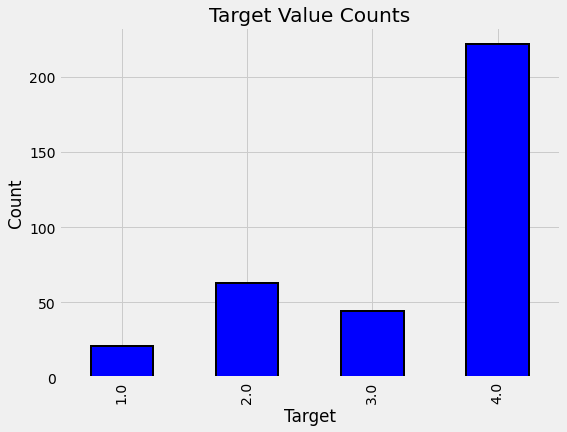

In [36]:
plot_value_counts(data[(data['rez_esc-missing'] ==1)], 'Target')

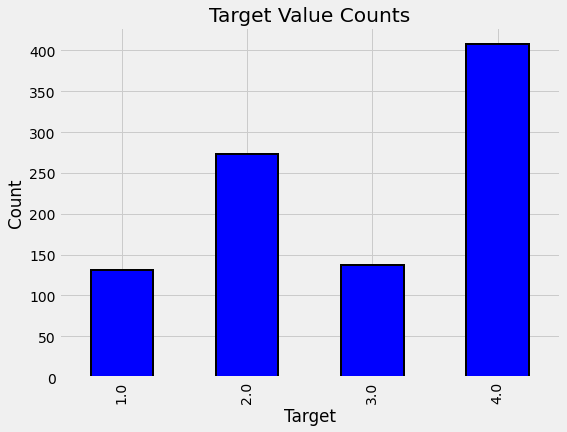

In [37]:
plot_value_counts(data[(data['v2a1-missing'] == 1)], 
                  'Target')

### Feature Engineering

- Automated feature engineering in Feature tools



#### Column Definitions

Ordinal variables can use statistical aggregations

Boolean variables can also be aggregated but with fewer stats

<br>

**Individual Variables: these are characteristics of each individual rather than the household**

- Boolean: Yes or No (0 or 1)
- Ordered Discrete: Integers with an ordering

<br>

**Household variables**

   - Boolean: Yes or No
   - Ordered Discrete: Integers with an ordering
   - Continuous numeric

**Squared Variables: derived from squaring variables in the data**

**Id variables: identifies the data and should not be used as features**



In [38]:
id_ = ['Id', 'idhogar', 'Target']


In [39]:
ind_bool = ['v18q', 'dis', 'male', 'female', 'estadocivil1', 'estadocivil2', 'estadocivil3', 
            'estadocivil4', 'estadocivil5', 'estadocivil6', 'estadocivil7', 
            'parentesco1', 'parentesco2',  'parentesco3', 'parentesco4', 'parentesco5', 
            'parentesco6', 'parentesco7', 'parentesco8',  'parentesco9', 'parentesco10', 
            'parentesco11', 'parentesco12', 'instlevel1', 'instlevel2', 'instlevel3', 
            'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8', 
            'instlevel9', 'mobilephone', 'rez_esc-missing']

ind_ordered = ['rez_esc', 'escolari', 'age']


In [40]:

hh_bool = ['hacdor', 'hacapo', 'v14a', 'refrig', 'paredblolad', 'paredzocalo', 
           'paredpreb','pisocemento', 'pareddes', 'paredmad',
           'paredzinc', 'paredfibras', 'paredother', 'pisomoscer', 'pisoother', 
           'pisonatur', 'pisonotiene', 'pisomadera',
           'techozinc', 'techoentrepiso', 'techocane', 'techootro', 'cielorazo', 
           'abastaguadentro', 'abastaguafuera', 'abastaguano',
            'public', 'planpri', 'noelec', 'coopele', 'sanitario1', 
           'sanitario2', 'sanitario3', 'sanitario5',   'sanitario6',
           'energcocinar1', 'energcocinar2', 'energcocinar3', 'energcocinar4', 
           'elimbasu1', 'elimbasu2', 'elimbasu3', 'elimbasu4', 
           'elimbasu5', 'elimbasu6', 'epared1', 'epared2', 'epared3',
           'etecho1', 'etecho2', 'etecho3', 'eviv1', 'eviv2', 'eviv3', 
           'tipovivi1', 'tipovivi2', 'tipovivi3', 'tipovivi4', 'tipovivi5', 
           'computer', 'television', 'lugar1', 'lugar2', 'lugar3',
           'lugar4', 'lugar5', 'lugar6', 'area1', 'area2', 'v2a1-missing']


In [41]:
hh_ordered = [ 'rooms', 'r4h1', 'r4h2', 'r4h3', 'r4m1','r4m2','r4m3', 'r4t1',  'r4t2', 
              'r4t3', 'v18q1', 'tamhog','tamviv','hhsize','hogar_nin',
              'hogar_adul','hogar_mayor','hogar_total',  'bedrooms', 'qmobilephone']

hh_cont = ['v2a1', 'dependency', 'edjefe', 'edjefa', 'meaneduc', 'overcrowding']
sqr_ = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq']

In [42]:
x = ind_bool + ind_ordered + id_ + hh_bool + hh_ordered + hh_cont + sqr_

from collections import Counter

print('There are no repeats: ', np.all(np.array(list(Counter(x).values()))== 1))
print('We covered every variable: ', len(x) == data.shape[1])

There are no repeats:  True
We covered every variable:  True


Squared Variables

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


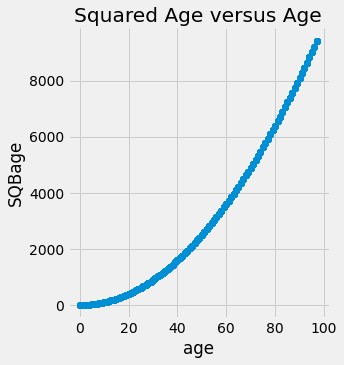

In [43]:
sns.lmplot('age', 'SQBage', data = data, fit_reg=False);
plt.title('Squared Age versus Age');

In [44]:
#Remove squared variables: 영향력이 강해서 지운다.

data= data.drop(columns = sqr_)
data.shape

(25045, 136)

In [46]:
#Household level variable

heads = data.loc[data['parentesco1'] == 1, :]
heads = heads[id_ + hh_bool + hh_cont + hh_ordered]
heads.shape

(7718, 99)

In [47]:
#Redundant Household Variables
corr_matrix = heads.corr()

#Select upper triangle of correlation martix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))

#Find index of feature columns with correlation greater than 0.95

to_drop = [column for column in upper.columns if any(abs(upper[column]) >0.95)]
to_drop

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


['abastaguafuera',
 'coopele',
 'sanitario3',
 'area2',
 'tamhog',
 'hhsize',
 'hogar_total']

In [48]:
corr_matrix.loc[corr_matrix['tamhog'].abs()>0.9, corr_matrix['tamhog'].abs()>0.9]

,r4t3,tamhog,hhsize,hogar_total
r4t3,1.000000,0.997709,0.997709,0.997709
tamhog,0.997709,1.000000,1.000000,1.000000
hhsize,0.997709,1.000000,1.000000,1.000000
hogar_total,0.997709,1.000000,1.000000,1.000000


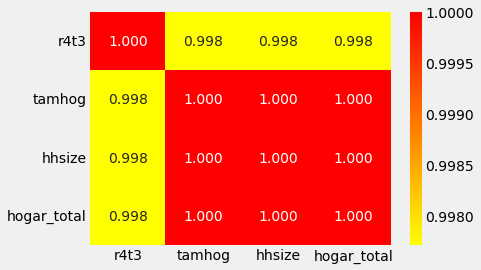

In [49]:
sns.heatmap(corr_matrix.loc[corr_matrix['tamhog'].abs() > 0.9, corr_matrix['tamhog'].abs() > 0.9],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

In [52]:
heads = heads.drop(columns = ['tamhog', 'hogar_total', 'r4t3'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Householdsize vs number of persons living in the household')

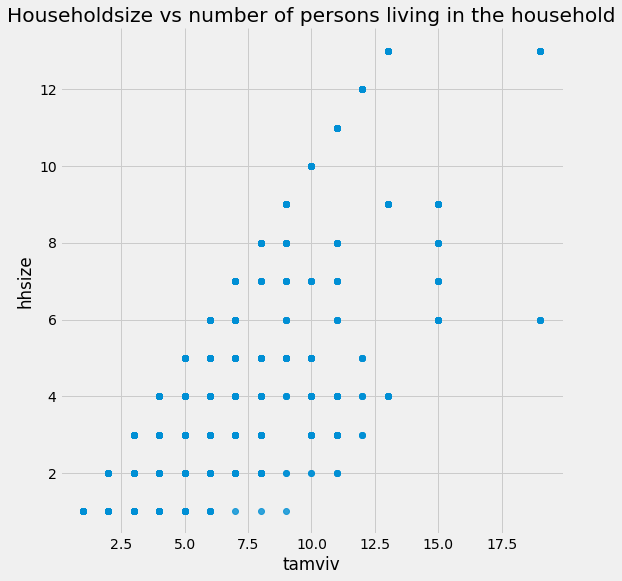

In [53]:
sns.lmplot('tamviv','hhsize', data, fit_reg=False, size=8);
plt.title('Householdsize vs number of persons living in the household')

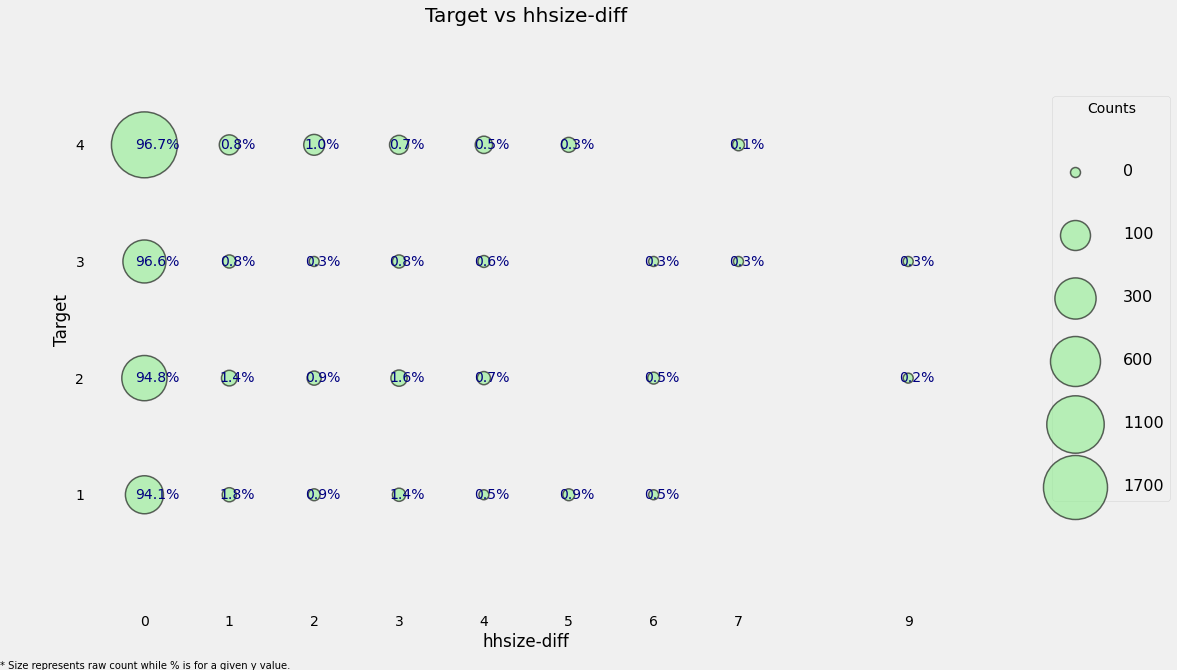

In [54]:
heads['hhsize-diff'] = heads['tamviv'] - heads['hhsize']
plot_categoricals('hhsize-diff', 'Target', heads)

In [55]:
corr_matrix.loc[corr_matrix['coopele'].abs() > 0.9, corr_matrix['coopele'].abs()>0.9]

,public,coopele
public,1.000000,-0.979543
coopele,-0.979543,1.000000


#### Creating Ordinal Variable


0: No electricity

1: Electricity from cooperative

2: Electricity from CNFL, ICA, ESPH/JASEC

3: Electricity from private plant

In [58]:
elec = []

#Assign values

for i,row in heads.iterrows():
    if row['noelec'] ==1:
        elec.append(0)
    elif row['coopele'] ==1:
        elec.append(1)
    elif row['public'] ==1:
        elec.append(2)
    elif row['planpri'] ==1:
        elec.append(3)
    else:
        elec.append(np.nan)

In [59]:
#Record the new variable and missing flag
heads['elec'] = elec
heads['elec-missing'] = heads['elec'].isnull()

#Remove the electricity columns



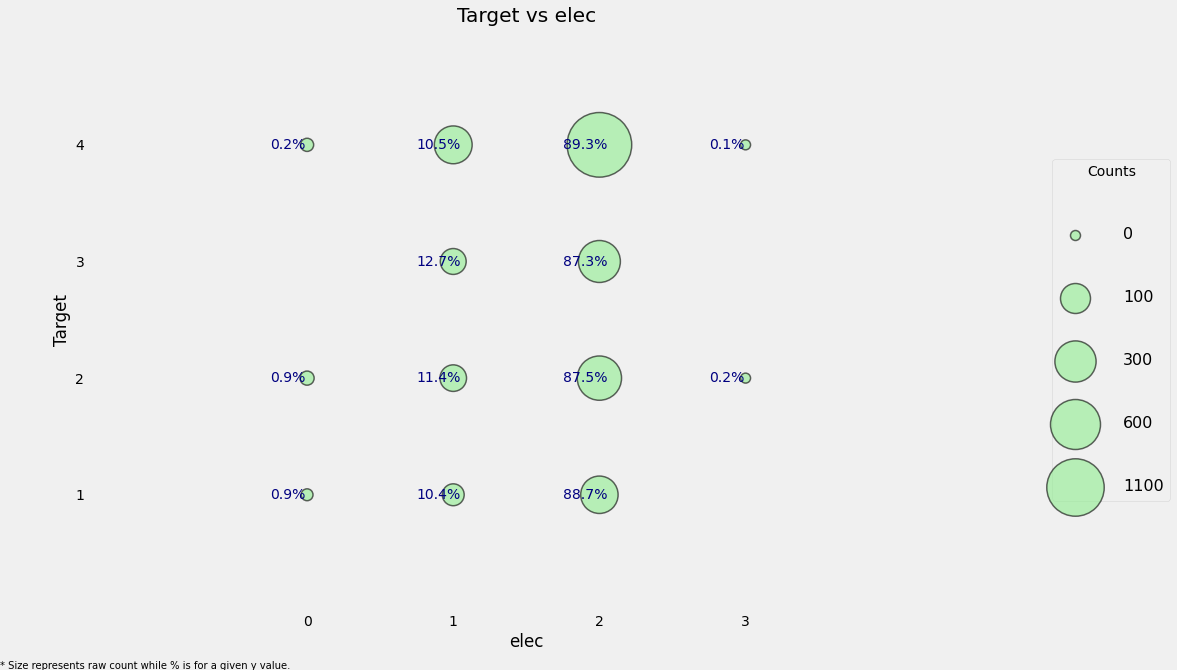

In [60]:
plot_categoricals('elec', 'Target', heads)

In [61]:
heads = heads.drop(columns = 'area2')
heads.groupby('area1')['Target'].value_counts(normalize=True)

area1  Target
0.0    4.0       0.582249
       2.0       0.176331
       3.0       0.147929
       1.0       0.093491
1.0    4.0       0.687030
       2.0       0.137688
       3.0       0.108083
       1.0       0.067199
Name: Target, dtype: float64

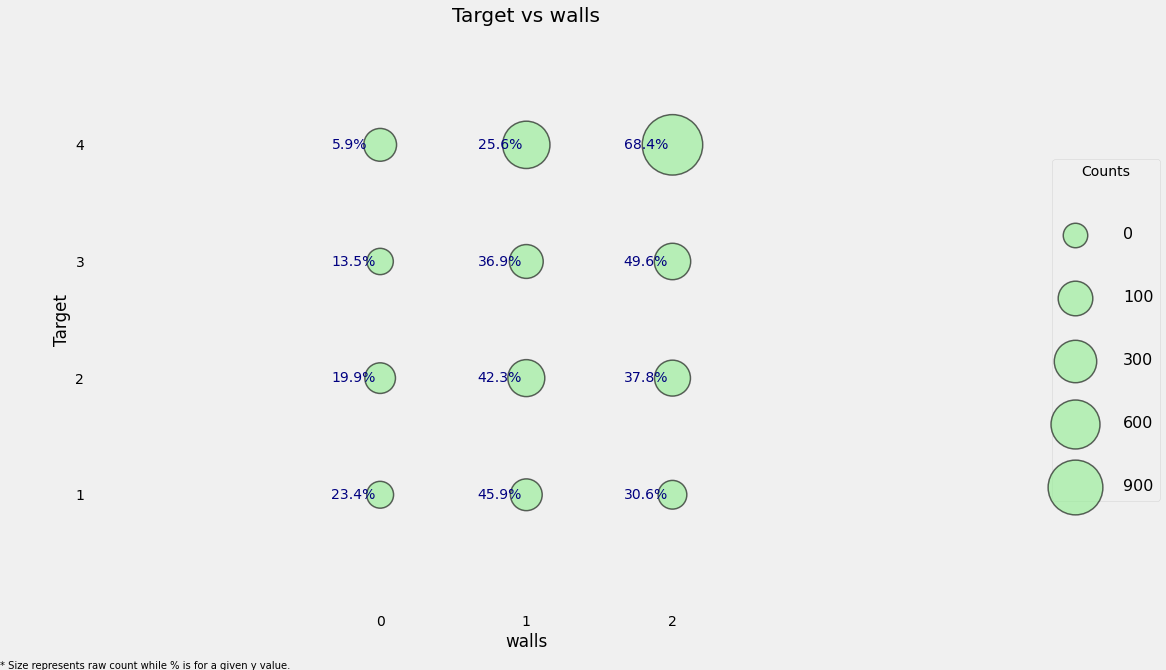

In [62]:
#Wall ordinal variable
heads['walls'] = np.argmax(np.array(heads[['epared1', 'epared2', 'epared3']]),axis=1)
plot_categoricals('walls', 'Target', heads)

In [64]:
# Roof ordinal variable
heads['roof'] = np.argmax(np.array(heads[['etecho1', 'etecho2', 'etecho3']]),
                           axis = 1)
heads = heads.drop(columns = ['etecho1', 'etecho2', 'etecho3'])

# Floor ordinal variable
heads['floor'] = np.argmax(np.array(heads[['eviv1', 'eviv2', 'eviv3']]),
                           axis = 1)
# heads = heads.drop(columns = ['eviv1', 'eviv2', 'eviv3'])